<a href="https://colab.research.google.com/github/TranToQuePhuong/AI_Lab06/blob/master/3_Exercise_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Decision Tree

## Use Decision Tree to classify the Iris dataset
- dataset: 'Iris.csv'


# **Grab the data**
Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [0]:
import pandas as pd

In [21]:
dataset = pd.read_csv('Iris.csv')
dataset.shape

# Overview about dataset
dataset.keys()

dataset.head()  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Prepare train data and test set**




The label is describe in **Species** column. So that we devide the dataset into attributes and labels

In [0]:
X = dataset.drop('Species', axis=1)  
y = dataset['Species']  

Here the X variable contains all the columns from the dataset, except the **Species** column, which is the label.

The y variable contains the values from the **Species** column.

The X variable is our attribute set and y variable contains corresponding labels

# **Dividing our data into training and test sets**

So, we split the test into 2 sets: training set and testing set. We use to split up 20% of the data in to the test set and 80% for training.

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(120, 5) 120
(30, 5) (30,)


# **Training with Decision Tree**


Now, let's build a **Decision Tree** model

### a) criterion='gini'

In [24]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(criterion='gini')  
dt.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_pred_dt = dt.predict(X_test)  
y_pred_dt

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

Evaluating the Algorithm

In [26]:
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")

Decision Tree classifier accuracy score is 1.0


### b) criterion='entropy'

In [27]:
from sklearn.tree import DecisionTreeClassifier  
dt2 = DecisionTreeClassifier(criterion='entropy')  
dt2.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
y_pred_dt = dt2.predict(X_test)  
y_pred_dt

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

##### Evaluating the Algorithm



In [29]:
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")

Decision Tree classifier accuracy score is 1.0


#**Extra section**

We can visualize the Decision Tree model using the [Graphviz](https://www.graphviz.org/) tool.

So let's generate the graph.

In [30]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None)
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 100.5\ngini = 0.666\nsamples = 120\nvalue = [38, 40, 42]"] ;
1 [label="X[4] <= 0.75\ngini = 0.5\nsamples = 78\nvalue = [38, 40, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


# **Jypiter does it all**

If we want to display the graph automatically inside Jupiter, we'll need
* Install Graphviz binary
* Call the Graphviz inside Jupiter and grab the result.

**Note**: Google Colab does not let us install Graphviz binary, so that we cant make with work with Google Colab.


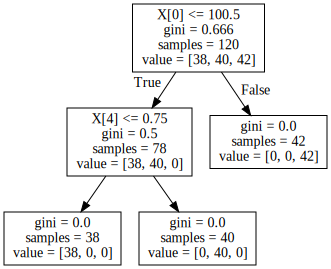

In [31]:
import graphviz 
graph = graphviz.Source(dot_data)
graph